In [14]:
import pandas as pd
import numpy as np

In [15]:
data = {
    'total_spend': [10000, 60000, 20000, np.nan, 5000, 40000],
    'active_days': [10, 30, 15, 25, np.nan, 20],
    'churn': [0, 1, 0, 1, 0, 0]
}

df = pd.DataFrame(data)
df

,total_spend,active_days,churn
0,10000.0,10.0,0
1,60000.0,30.0,1
2,20000.0,15.0,0
3,NaN,25.0,1
4,5000.0,NaN,0
5,40000.0,20.0,0


In [16]:
df["avg_spend_per_day"] = df["total_spend"] / df["active_days"]
df["is_high_value_customer"] = (df["total_spend"] > 50000).astype(int)

In [17]:
df

,total_spend,active_days,churn,avg_spend_per_day,is_high_value_customer
0,10000.0,10.0,0,1000.000000,0
1,60000.0,30.0,1,2000.000000,1
2,20000.0,15.0,0,1333.333333,0
3,NaN,25.0,1,NaN,0
4,5000.0,NaN,0,NaN,0
5,40000.0,20.0,0,2000.000000,0


In [18]:
df.fillna(0, inplace=True)
df

,total_spend,active_days,churn,avg_spend_per_day,is_high_value_customer
0,10000.0,10.0,0,1000.000000,0
1,60000.0,30.0,1,2000.000000,1
2,20000.0,15.0,0,1333.333333,0
3,0.0,25.0,1,0.000000,0
4,5000.0,0.0,0,0.000000,0
5,40000.0,20.0,0,2000.000000,0


In [19]:
#model traning and Evaluation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

X = df.drop("churn", axis=1)
y = df["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Added random_state for reproducibility
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
preds = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

print("AUC:", roc_auc_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1-Score:", f1_score(y_test, y_pred, zero_division=0))

AUC: 0.0
Confusion Matrix:
 [[1 0]
 [1 0]]
Accuracy: 0.5
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


In [22]:
from sklearn.metrics import confusion_matrix
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
actual_labels = np.array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0])
predicted_labels = np.array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [25]:
cm = confusion_matrix(actual_labels,predicted_labels)
print(cm)

[[5 1]
 [1 3]]


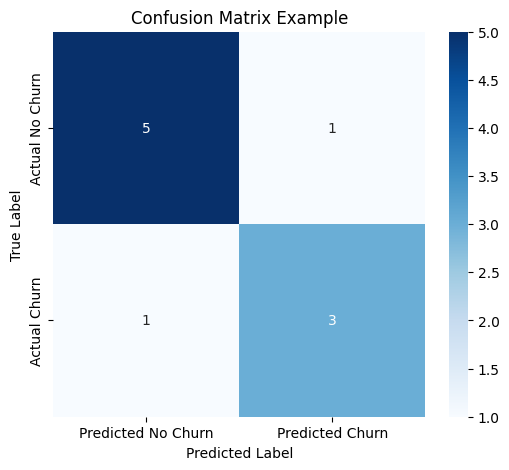

In [26]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Example')
plt.show()